In [9]:
import sys
plist = ['/Applications/NEURON/lib/python']
for pd in plist:
    if pd in sys.path:
        sys.path.remove(pd)

Text(0.5, 0, 'time (ms)')

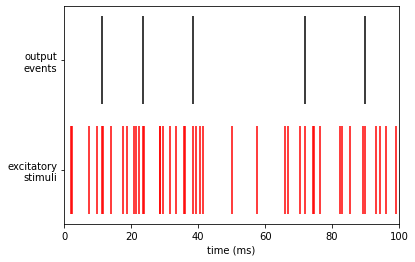

In [10]:
# Example of IntFire1 cell
# Equivalent example of entire integrate and fire cell
from neuron import h
from neuron.units import ms,mV
import matplotlib.pyplot as plt

h.load_file('stdrun.hoc')

my_cell = h.IntFire1()
my_cell.tau = 4 * ms
my_cell.refrac = 10 * ms

# stimulus
e_stims = h.NetStim()
e_stims.noise = True
e_stims.interval = 3 * ms
e_stims.start = 0 * ms
e_stims.number = 1e10
nc = h.NetCon(e_stims,my_cell)
nc.weight[0] = 0.5
nc.delay = 0 * ms

stim_times = h.Vector()
output_times = h.Vector()
stim_times_nc = h.NetCon(e_stims,None)
stim_times_nc.record(stim_times)
output_times_nc = h.NetCon(my_cell,None)
output_times_nc.record(output_times)

h.finitialize(-65 * mV)
h.continuerun(100 * ms)

fig,ax = plt.subplots()

for c, (color, data) in enumerate([("red", stim_times), ("black", output_times)]):
    ax.vlines(data, c - 0.4, c + 0.4, colors=color)

ax.set_yticks([0, 1])
ax.set_yticklabels(['excitatory\nstimuli','output\nevents'])

ax.set_xlim([0, h.t])
ax.set_xlabel('time (ms)')